# Pyplot tutorial

An introduction to the pyplot interface.

## Intro to pyplot

`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

> **Note**
>
>the pyplot API is generally less-flexible than the object-oriented API. Most of the function calls you see here can also be called as methods from an Axes object. We recommend browsing the tutorials and examples to see how this works.
>

Generating visualizations with pyplot is very quick:

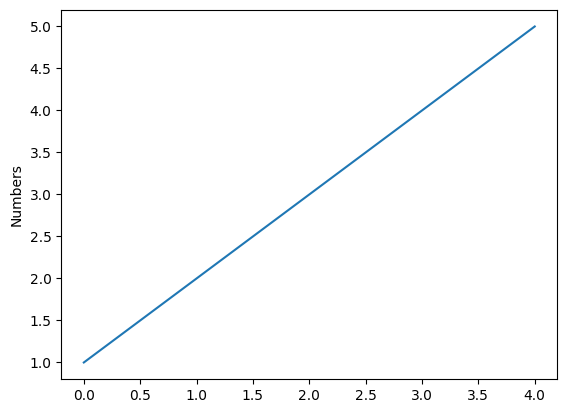

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5])
plt.ylabel('Numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are `[0, 1, 2, 3]`.

`plot` is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:

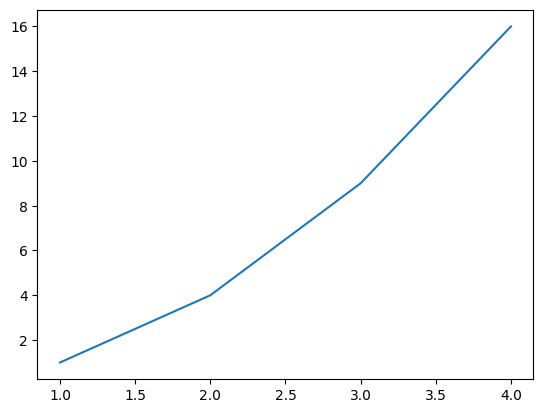

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

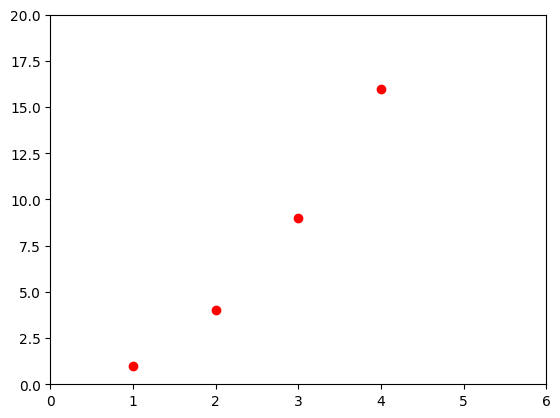

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the `plot` documentation for a complete list of line styles and format strings. The `axis` function in the example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one function call using arrays.

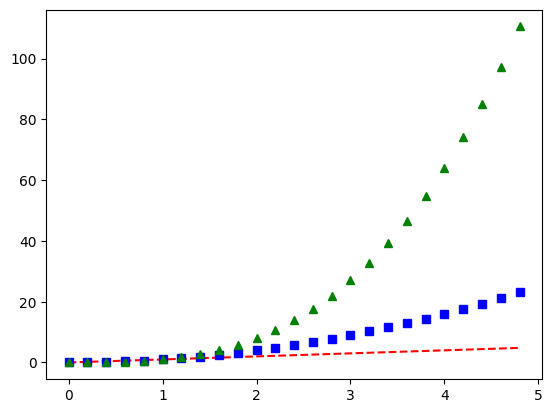

In [6]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with `numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with the `data` keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

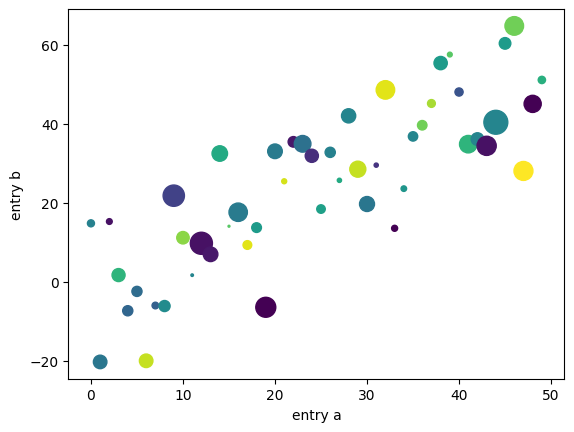

In [7]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

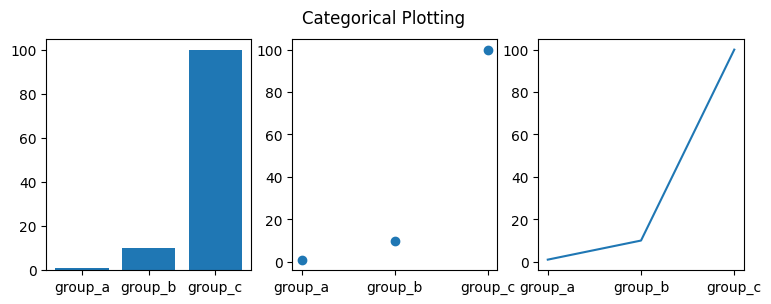

In [8]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

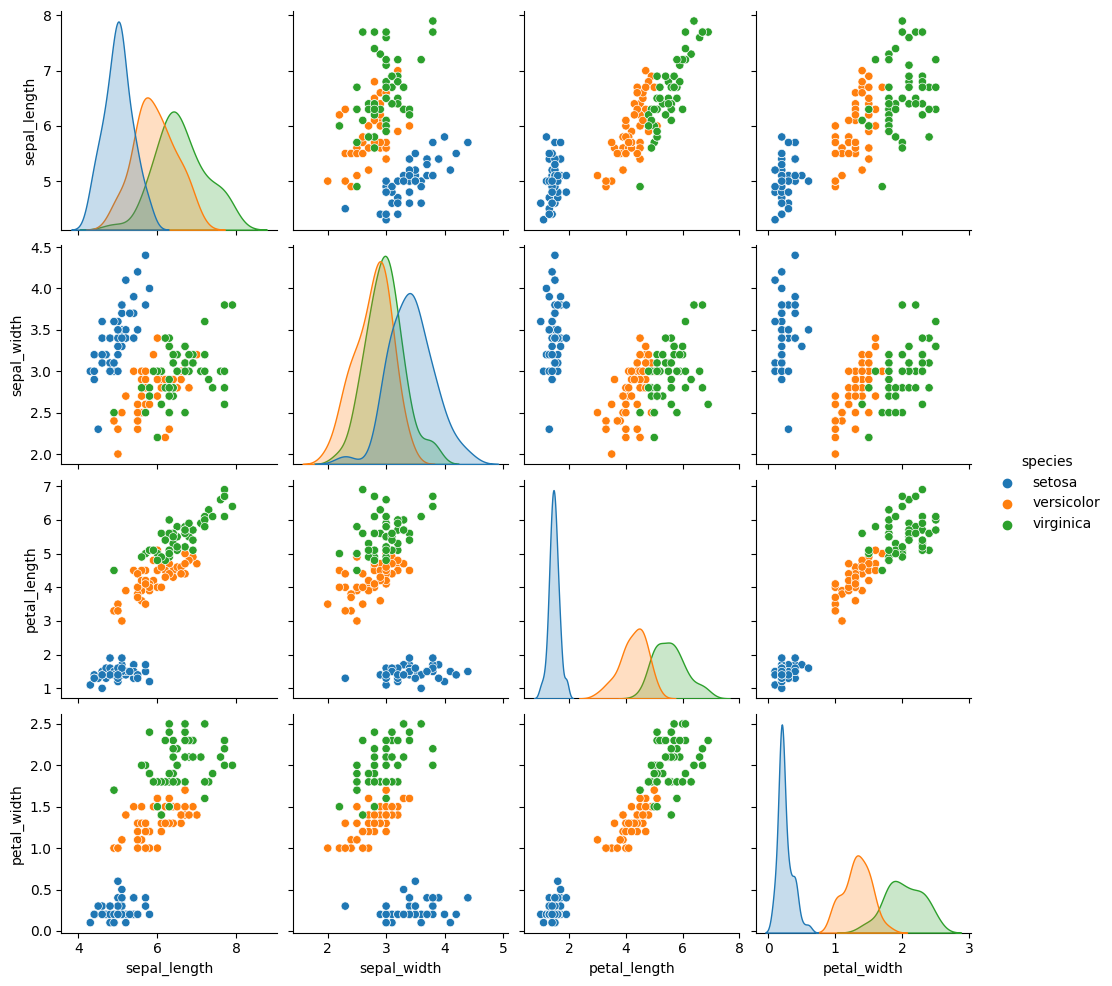

In [9]:
import seaborn as sns

# Load iris dataset
iris = sns.load_dataset('iris')

# Plot pairwise relationships between the features
sns.pairplot(iris, hue='species')


In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = logreg.predict(X_test)


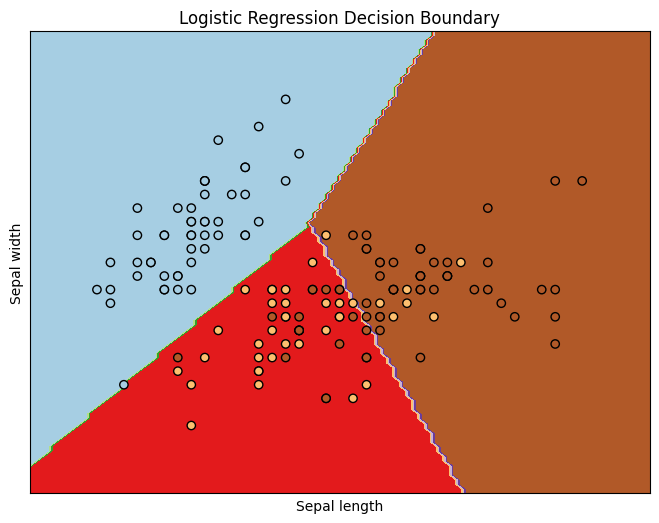

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()

# Select only the first two features for visualization
X = iris.data[:, :2]
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Logistic Regression Decision Boundary')
plt.show()


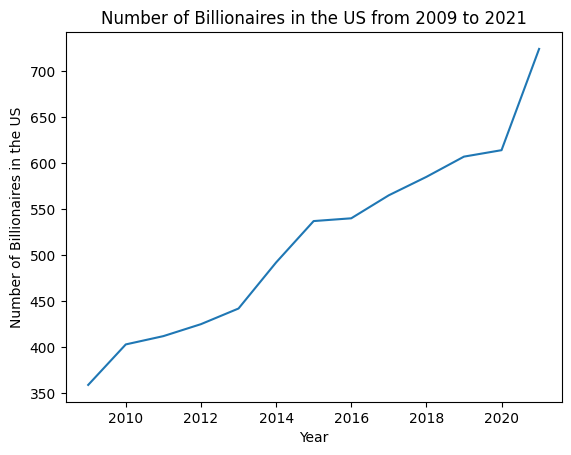

In [12]:
import matplotlib.pyplot as plt

# Define the years and number of billionaires
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
num_billionaires = [359, 403, 412, 425, 442, 492, 537, 540, 565, 585, 607, 614, 724]

# Create the plot
plt.plot(years, num_billionaires)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Billionaires in the US')
plt.title('Number of Billionaires in the US from 2009 to 2021')

# Display the plot
plt.show()


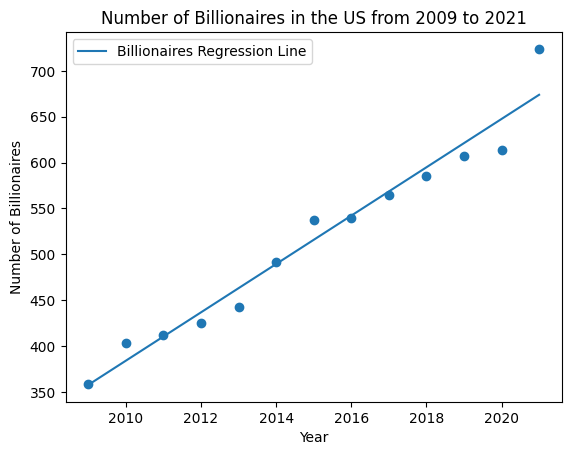

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the years and number of billionaires
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
num_billionaires = [359, 403, 412, 425, 442, 492, 537, 540, 565, 585, 607, 614, 724]


# Create the plot
plt.scatter(years, num_billionaires)
plt.plot(years, np.poly1d(np.polyfit(years, num_billionaires, 1))(years), label='Billionaires Regression Line')


# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Billionaires')
plt.title('Number of Billionaires in the US from 2009 to 2021')

# Add a legend
plt.legend()

# Display the plot
plt.show()


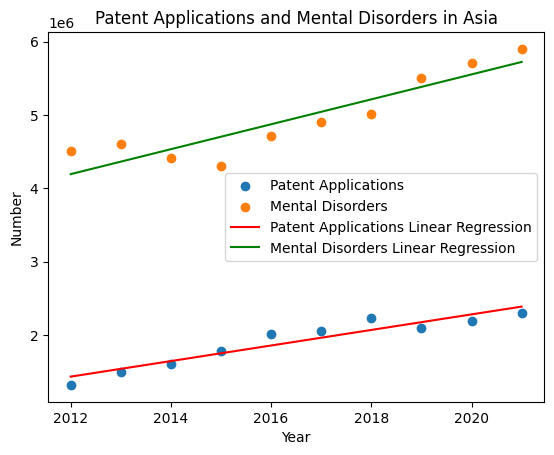

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the data for patent applications in Asia by year
patent_data = [1321200, 1497500, 1607200, 1785400, 2020200, 2062500, 2229200, 2102200, 2188700, 2299600]

# Define the data for mental disorders in Asia by year
mental_disorders_data = [4509005, 4609006, 4409006, 4309007, 4709007, 4909008, 5009008, 5509009, 5709009, 5900000]

# Define the years for the data
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Create a plot of the data
fig, ax = plt.subplots()
ax.scatter(years, patent_data, label='Patent Applications')
ax.scatter(years, mental_disorders_data, label='Mental Disorders')

# Create linear regression lines for patent applications and mental disorders
x = np.array(years).reshape((-1, 1))
patent_model = LinearRegression().fit(x, patent_data)
mental_disorders_model = LinearRegression().fit(x, mental_disorders_data)

# Plot the linear regression lines
patent_y_pred = patent_model.predict(x)
mental_disorders_y_pred = mental_disorders_model.predict(x)
ax.plot(years, patent_y_pred, color='red', label='Patent Applications Linear Regression')
ax.plot(years, mental_disorders_y_pred, color='green', label='Mental Disorders Linear Regression')

ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('Patent Applications and Mental Disorders in Asia')
ax.legend()
plt.show()
